<a href="https://colab.research.google.com/github/Ivonne-Rojas/Simulation-of-Different-Age-Distributions-for-the-Analysis-of-the-Aging-Curve-of-a-Population-of-S./blob/main/Experimental_growth_curve_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import collections as coll 
import random  
import openpyxl 
from openpyxl import load_workbook # 
from time import time  
from timeit import timeit 
from scipy.interpolate import interp1d 	
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression 

In [2]:
# These are the experimental data taken from Slipstreaming Mother Machine: A Microfluidic Device for
# Single-Cell Dynamic Imaging of Yeast

time=[12,13,14,15,16,17,18,19,20,21]# units are in hours 
OD=[0.0993333333333333,0.147666666666667,0.203,0.273,0.382333333333333,0.484333333333333,0.723333333333333,0.780333333333333,0.977666666666667,1.035]

Ntime=np.array(time)
NOD=np.array(OD)

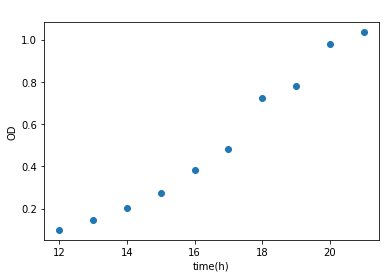

In [3]:
plt.scatter(time, OD)
plt.xlabel('time(h)')
plt.ylabel('OD')
plt.title(' ')
plt.show()  

popt [  4.13490858  -0.44174271 -20.54597581   1.33100493] pcov [[-9.00336687e+14 -2.75564303e+06  4.92912293e+14 -1.08228423e+06]
 [-2.75564309e+06 -6.01567682e-03  1.50864710e+06  2.57766337e-03]
 [ 4.92912293e+14  1.50864705e+06 -2.69857413e+14  5.92524051e+05]
 [-1.08228451e+06  2.57766257e-03  5.92524198e+05  1.66043698e-02]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


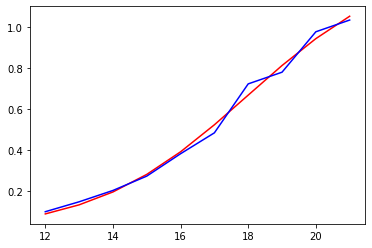

In [4]:
#fit 
def fsigmoid(x,a,b,c,k):
  return k*a*np.exp(-b*(x+c))/ (k + a*np.exp(-b*(x+c)))#Model used for the logistic growth model 
#k load capacity, a initial population, b growth rate,c parameter  
xdata = np.linspace(0, 35, 35)
ydata = np.random.normal(size=len(xdata))
popt, pcov = curve_fit(fsigmoid, Ntime, NOD)
a=curve_fit(fsigmoid,Ntime,NOD)
print('popt',popt,'pcov', pcov)
plt.figure()
plt.plot(Ntime, fsigmoid(Ntime, *popt), 'r-', label='fit')
#plt.plot(x,y)
plt.plot(Ntime, NOD, 'b-', label='data')
plt.show()

In [5]:
ylist=[]
for i in xdata:
  y=fsigmoid(i,popt[0],popt[1],popt[2],popt[3])
  ylist.append(y)

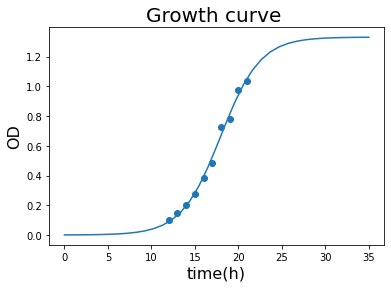

In [6]:
plt.plot(xdata,ylist)
plt.scatter(time, OD)
axes = plt.gca() 
plt.xlabel('time(h)')
plt.ylabel('OD')
plt.title('Growth curve ')
axes.title.set_size(20)
axes.xaxis.label.set_size(16)
axes.yaxis.label.set_size(16)
plt.savefig('Growth curve ajuste_2.png')
plt.show()

In [7]:
#takes the logarithm of OD
LogOD=[]
for i in range(len(ylist)):
  lo=np.log(ylist[i])
  LogOD.append(lo)
print(LogOD)

[-7.656925128342914, -7.202394464089416, -6.747981446463002, -6.293753685554822, -5.839817532440498, -5.386340110023341, -4.933583624714041, -4.481958441466196, -4.0321042939112575, -3.5850123861574033, -3.1422038033018618, -2.7059780244352334, -2.2797311847824053, -1.8683018764996582, -1.478214261533083, -1.1175574252628344, -0.7951521466863679, -0.5188241188569492, -0.293195316698558, -0.11809411017025336, 0.011382005858363995, 0.10319492313316267, 0.16616082119813466, 0.20827951627513547, 0.23595917295452454, 0.2539310257777196, 0.2655060881555578, 0.2729219157434502, 0.2776568041038684, 0.2806733102467078, 0.2825923637837972, 0.28381213885643364, 0.2845870000927429, 0.28507905105288556, 0.28539144010375295]


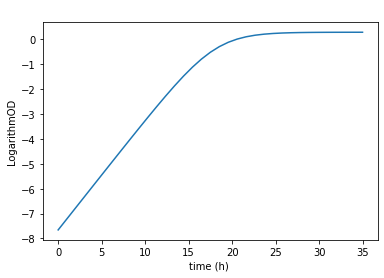

In [8]:
#graph of logarithm of OD verus time 
plt.plot(xdata, LogOD)
plt.xlabel('time (h) ')
plt.ylabel('LogarithmOD')
plt.title(' ')
plt.show() 

In [9]:
#calculates the slope of the graph of the logarithm of OD vs time
pendientes=[]
for i in range(len(LogOD)-1):
  y=LogOD[i+1]-LogOD[i]
  x=xdata[i+1]-xdata[i]
  pendiente=y/x
  pendientes.append(pendiente)
print(pendientes)
print(len(pendientes))

[0.44154407384625577, 0.4414297885513735, 0.4412498248822316, 0.4409665487396295, 0.44052092463380943, 0.43982058572903454, 0.4387216065836212, 0.43700117191051147, 0.43431785324660127, 0.4301569090596689, 0.42376218518472475, 0.41406835851989016, 0.3996741851889544, 0.3789422545389587, 0.3503523552339559, 0.3131936991885675, 0.2684329413200063, 0.2191822649538662, 0.17009831491321054, 0.1257767984277995, 0.08918969106694714, 0.061166872405972905, 0.040915303789086574, 0.026888809345692197, 0.01745837131396088, 0.011244346309900016, 0.007203946799666904, 0.004599605835834804, 0.0029303202530439657, 0.0018642234360297376, 0.0011849243562753922, 0.0007527223438432853, 0.00047799236128143424, 0.00030346364941403537]
34


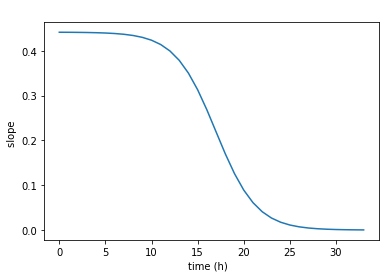

In [10]:
plt.plot(pendientes)
plt.xlabel('time (h)  ')
plt.ylabel('slope ')
plt.title(' ')
plt.show() 

In [11]:
#caculate the change of the slope per centual 
deltapen=[]
for i in range(len(pendientes)-1):
  de=((pendientes[i+1]-pendientes[i])/pendientes[i])*100
  deltapen.append(de)
print(deltapen)
print(len(deltapen))
print(xdata)

[-0.02588310015957111, -0.04076835632966569, -0.06419858470826621, -0.10105621550971053, -0.15897971370078673, -0.24986987446067588, -0.39214724036661036, -0.6140300842167263, -0.958041249243746, -1.4866026187800052, -2.2875629312249504, -3.4762794680541367, -5.187207835350756, -7.5446585759581675, -10.606081417827168, -14.291717229474553, -18.347478563529577, -22.394124839884704, -26.05641126311289, -29.088916094373886, -31.419347152957265, -33.108720162237326, -34.28178002954409, -35.071980728079915, -35.59338321033253, -35.932720310079446, -36.15158518317375, -36.29192679480701, -36.38158033773903, -36.438715801205575, -36.47507202828207, -36.49818353459813, -36.5128663143299]
33
[ 0.          1.02941176  2.05882353  3.08823529  4.11764706  5.14705882
  6.17647059  7.20588235  8.23529412  9.26470588 10.29411765 11.32352941
 12.35294118 13.38235294 14.41176471 15.44117647 16.47058824 17.5
 18.52941176 19.55882353 20.58823529 21.61764706 22.64705882 23.67647059
 24.70588235 25.7352941

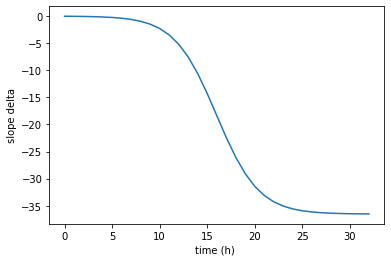

In [12]:
plt.plot(deltapen)
plt.xlabel('time (h) ')
plt.ylabel('slope delta')
plt.title('')
plt.show() 



---



---

